<a href="https://colab.research.google.com/github/palanipsb/Python-Learning/blob/main/Linear_Regression_Insurance_Updated.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_csv("/content/insurance.csv")

In [ ]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [ ]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [ ]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [ ]:
df.shape

(1338, 7)

In [ ]:
df.nunique()

age           47
sex            2
bmi          548
children       6
smoker         2
region         4
charges     1337
dtype: int64

In [ ]:
df.duplicated().sum()

1

In [ ]:
df.drop_duplicates(inplace=True)

In [ ]:
df.shape

(1337, 7)

<function matplotlib.pyplot.show(close=None, block=None)>

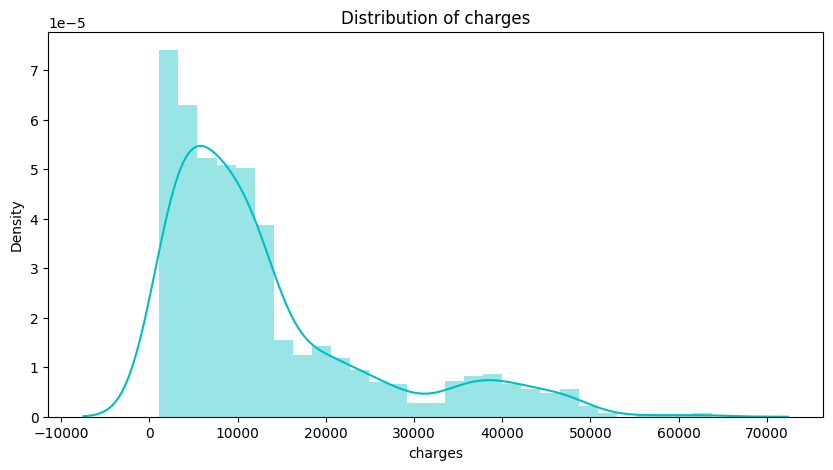

In [ ]:
f,ax = plt.subplots(1,1,figsize=(10,5))
ax = sns.distplot(df['charges'],kde = True,color = 'c')
plt.title('Distribution of charges')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

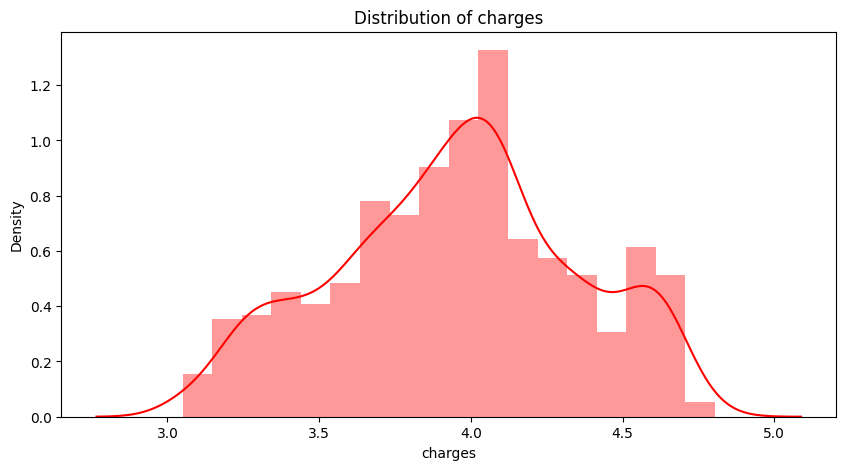

In [ ]:
f,ax = plt.subplots(1,1,figsize=(10,5))
ax = sns.distplot(np.log10(df['charges']),kde = True,color = 'r')
plt.title('Distribution of charges')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

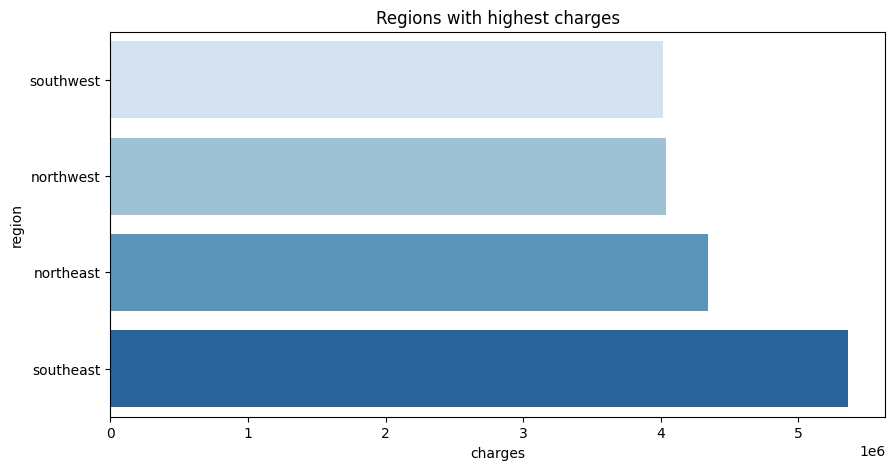

In [ ]:
charges = df['charges'].groupby(df.region).sum().sort_values(ascending=True)
f,ax = plt.subplots(1,1,figsize=(10,5))
ax = sns.barplot(x=charges.head(),y=charges.head().index,palette='Blues')
plt.title('Regions with highest charges')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

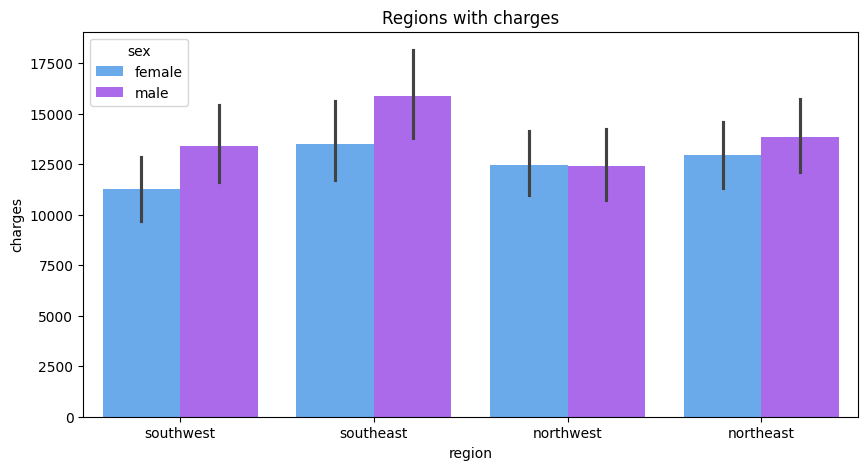

In [ ]:
f,ax = plt.subplots(1,1,figsize=(10,5))
ax = sns.barplot(x='region',y='charges',hue='sex',data=df,palette='cool')
plt.title('Regions with charges')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

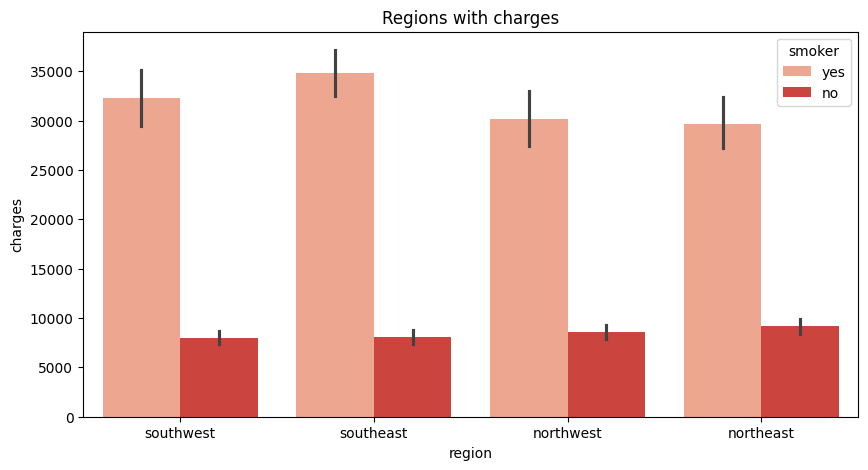

In [ ]:
f,ax = plt.subplots(1,1,figsize=(10,5))
ax = sns.barplot(x='region',y='charges',hue='smoker',data=df,palette='Reds')
plt.title('Regions with charges')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

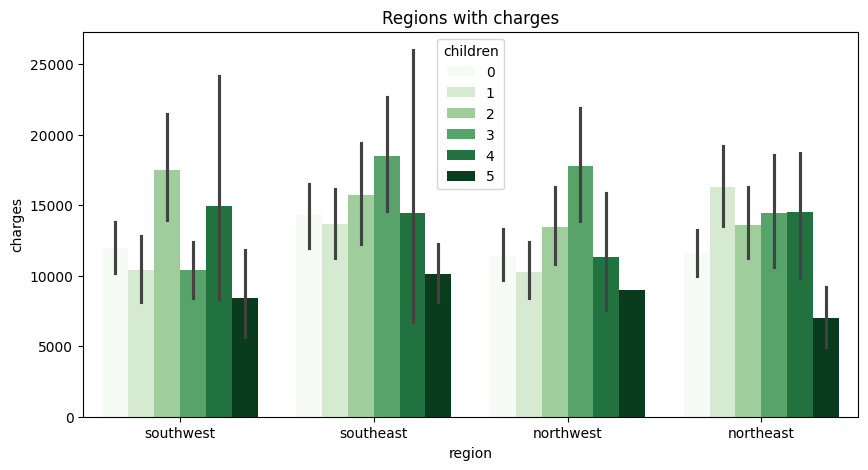

In [ ]:
f,ax = plt.subplots(1,1,figsize=(10,5))
ax = sns.barplot(x='region',y='charges',hue='children',data=df,palette='Greens')
plt.title('Regions with charges')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

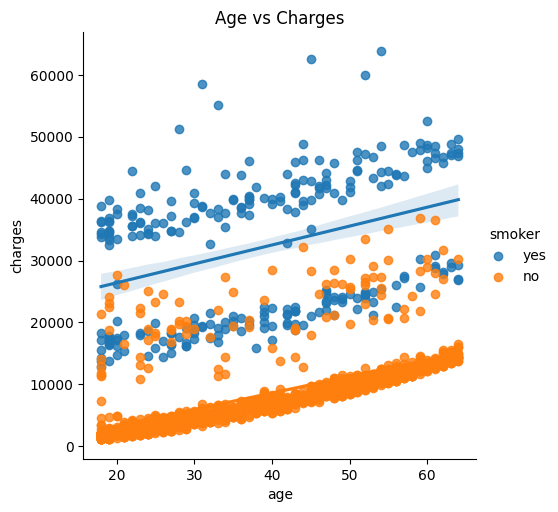

In [ ]:
ax = sns.lmplot(x='age', y='charges',hue='smoker', data=df)
plt.title('Age vs Charges')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

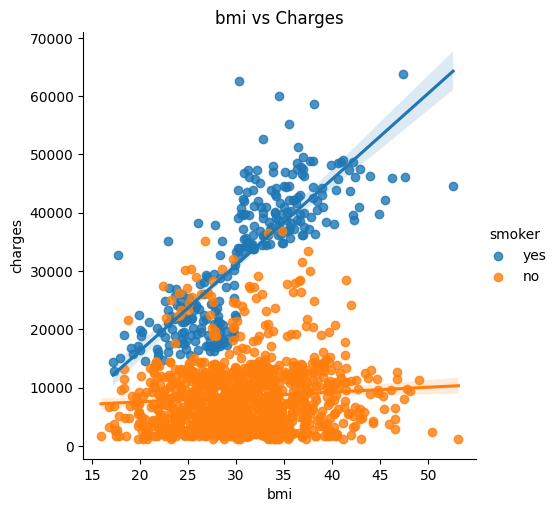

In [ ]:
ax = sns.lmplot(x='bmi', y='charges',hue='smoker', data=df)
plt.title('bmi vs Charges')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

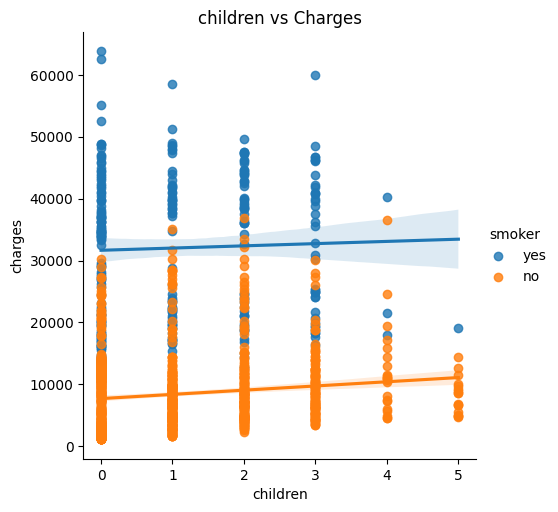

In [ ]:
ax = sns.lmplot(x='children', y='charges',hue='smoker', data=df)
plt.title('children vs Charges')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

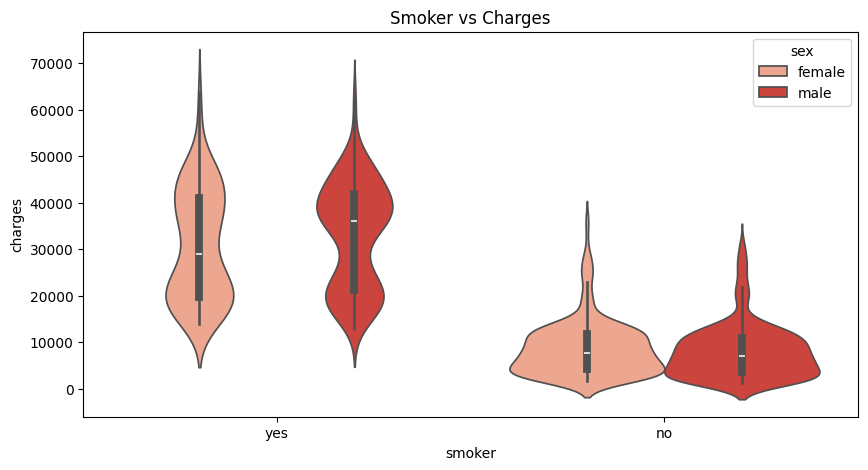

In [ ]:
f,ax = plt.subplots(1,1,figsize=(10,5))
ax = sns.violinplot(x='smoker',y='charges', hue='sex',data=df,palette='Reds')
plt.title('Smoker vs Charges')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

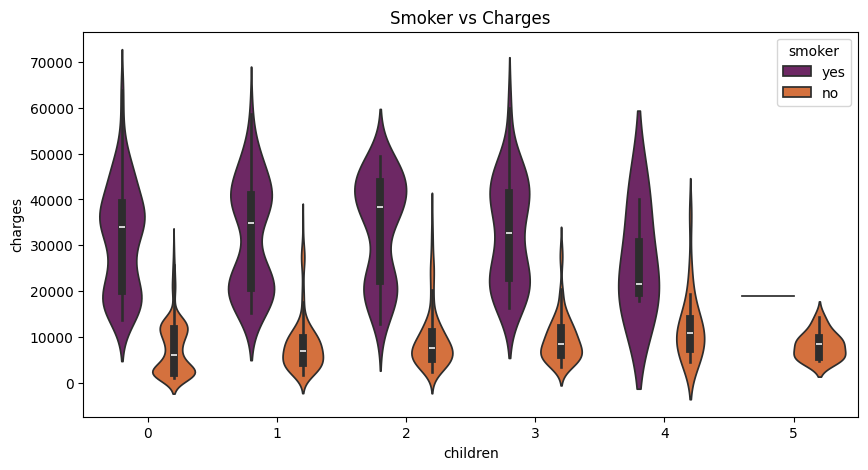

In [ ]:
f,ax = plt.subplots(1,1,figsize=(10,5))
ax = sns.violinplot(x='children',y='charges',hue='smoker',orient='v',data=df,palette='inferno')
plt.title('Smoker vs Charges')
plt.show

In [ ]:
df = pd.get_dummies(df,drop_first=True,dtype=int)

In [ ]:
df.head()

,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,0,1,0,0,1
1,18,33.770,1,1725.55230,1,0,0,1,0
2,28,33.000,3,4449.46200,1,0,0,1,0
3,33,22.705,0,21984.47061,1,0,1,0,0
4,32,28.880,0,3866.85520,1,0,1,0,0


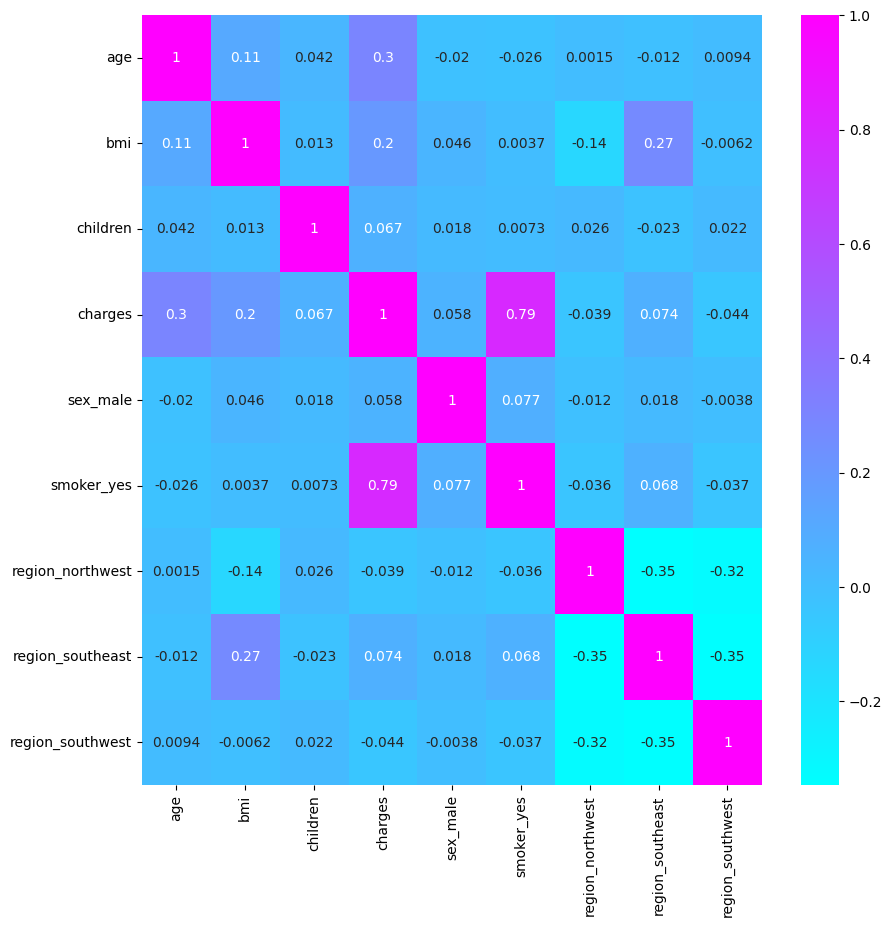

In [ ]:
f, ax = plt.subplots(1, 1, figsize=(10, 10))
ax = sns.heatmap(df.corr(), annot=True, cmap='cool')

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score
x = df.drop(['charges'],axis=1)
y = df['charges']
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [ ]:
Lin_reg = LinearRegression()
Lin_reg.fit(x_train,y_train)
X_train_pred = Lin_reg.predict(x_train)
X_test_pred = Lin_reg.predict(x_test)
print(Lin_reg.score(x_test,y_test))
print(mean_squared_error(y_train,X_train_pred))
print(mean_squared_error(y_test,X_test_pred))
print(r2_score(y_train,X_train_pred))
print(r2_score(y_test,X_test_pred))

0.8357482955959807
22000916.808450025
27631993.106147405
0.8438825001447943
0.8357482955959807


In [ ]:
from sklearn.linear_model import Ridge,Lasso
Ridge_reg = Ridge(alpha=0.5)
Ridge_reg.fit(x_train,y_train)
X_train_pred = Ridge_reg.predict(x_train)
X_test_pred = Ridge_reg.predict(x_test)
print(Ridge_reg.score(x_test,y_test))
print(mean_squared_error(y_train,X_train_pred))
print(mean_squared_error(y_test,X_test_pred))
print(r2_score(y_train,X_train_pred))
print(r2_score(y_test,X_test_pred))

0.8366217171208655
22006269.928332683
27485057.781232826
0.843844514650836
0.8366217171208655


In [ ]:
Lasso_reg = Lasso(alpha=0.2)
Lasso_reg.fit(x_train,y_train)
X_train_pred = Lasso_reg.predict(x_train)
X_test_pred = Lasso_reg.predict(x_test)
print(Lasso_reg.score(x_test,y_test))
print(mean_squared_error(y_train,X_train_pred))
print(mean_squared_error(y_test,X_test_pred))
print(r2_score(y_train,X_train_pred))
print(r2_score(y_test,X_test_pred))

0.8357045299163608
22000927.118349645
27639355.78747807
0.843882426986218
0.8357045299163608


In [ ]:
from sklearn.ensemble import RandomForestRegressor
RF_reg = RandomForestRegressor(n_estimators = 100,max_depth = 5,
                              min_samples_split = 2,
                              min_samples_leaf = 1,
                              random_state = 42,
                              n_jobs = -1)
RF_reg.fit(x_train,y_train)
X_train_pred = RF_reg.predict(x_train)
X_test_pred = RF_reg.predict(x_test)
print(RF_reg.score(x_test,y_test))
print(mean_squared_error(y_train,X_train_pred))
print(mean_squared_error(y_test,X_test_pred))
print(r2_score(y_train,X_train_pred))
print(r2_score(y_test,X_test_pred))

0.8985508096917187
17324474.322941307
18641903.911206204
0.8734651713525763
0.8985508096917187


In [ ]:
print("feature importance")
feature_importance = pd.DataFrame(RF_reg.feature_importances_,
                                   index = x_train.columns,
                                    columns=['importance']).sort_values('importance',ascending=False)
print(feature_importance)

feature importance
                  importance
smoker_yes          0.610281
bmi                 0.210515
age                 0.135803
children            0.021315
sex_male            0.006276
region_northwest    0.005812
region_southeast    0.005576
region_southwest    0.004423


In [ ]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=2)
x=df.drop(['charges','sex_male','region_northwest','region_southeast','region_southwest'],axis=1)
y=df['charges']
x_pol = poly.fit_transform(x)
x_train,x_test,y_train,y_test = train_test_split(x_pol,y,test_size=0.2,random_state=42)
Pol_reg = LinearRegression()
Pol_reg.fit(x_train,y_train)
X_train_pred = Pol_reg.predict(x_train)
X_test_pred = Pol_reg.predict(x_test)
print(Pol_reg.score(x_test,y_test))
print(mean_squared_error(y_train,X_train_pred))
print(mean_squared_error(y_test,X_test_pred))
print(r2_score(y_train,X_train_pred))
print(r2_score(y_test,X_test_pred))

0.8826693356852879
23398583.791254964
21560221.065798957
0.8291009738345605
0.8826693356852879
